# Introduction

Healthcare is one of the extremely important services of a nation to keep their population healthy and working for the economy to boom. Lack of healthcare or the collapse of healthcare can lead to massive implications for a country's development. This is the reason as to why every goverment of every country spends billions of dollars to improve and keep their healthcare functioning so as to give the general population affordable healthcare options.

However, challenges faced by a country such as India are far more complicated than the rest of the world. A country with 1.33 billion people with sizeable population living in the remote areas make it a very tough task for everyone to be provided with equal and afforable healthcare oppoptunities. Many poor people need to travel thousands of KMs to get the required healthcare. Another issue faced by healthcares due to the increasing population is the lack of beds and healthcare personnel. This has been especially observed during the tough times of COVID-19 where people with even mild symptoms would flock in big numbers at the goverment healthcare facilities making it extremely tough for the officials to manage the patients.

Innovative methods must be sought after so that the officials can be able to forecast the traffic of patients. Judging the health problems, we can come up with a ML algorithm that can predict how long would a patient require hospitalisation. If the algorithm can help the officials get a ballpark value of hospitalisation period, they'll be able to handle the traffic of patients much better.

![image.png](attachment:image.png)

### Problem Statement
Recent Covid-19 Pandemic has raised alarms over one of the most overlooked area to focus: Healthcare Management. While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.
This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to miminize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning.
Suppose you have been hired as Data Scientist of HealthMan – a not for profit organization dedicated to manage the functioning of Hospitals in a professional and optimal manner.

The task is to accurately predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.

In [ ]:
## Importing Necessary Libraries/Packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## For Label Encoding
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample_sub.csv to sample_sub.csv
Saving test_data.csv to test_data.csv
Saving train_data.csv to train_data.csv
Saving train_data_dictionary.csv to train_data_dictionary.csv


In [ ]:
import pandas as pd

train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")
train_dict = pd.read_csv("train_data_dictionary.csv")

In [ ]:
## Import CSV files

##train=pd.read_csv('S:\\ML\\Datasets\\project\\train.csv')
##test=pd.read_csv('S:\\ML\\Datasets\\project\\test.csv')
##train_dict=pd.read_csv('S:\\ML\\Datasets\\project\\train_data_dict.csv')

In [ ]:
train.shape,test.shape

((318438, 18), (137057, 17))

In [ ]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


### Attributes Information

In [ ]:
train_dict

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [ ]:
test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


## Checking Train Data

In [ ]:
##Checking Shape of data
train.shape

(318438, 18)

train data contains 318438 rows and 18 attributes

In [ ]:
## Checking train data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [ ]:
train.dtypes

,0
case_id,int64
Hospital_code,int64
Hospital_type_code,object
City_Code_Hospital,int64
Hospital_region_code,object
Available Extra Rooms in Hospital,int64
Department,object
Ward_Type,object
Ward_Facility_Code,object
Bed Grade,float64


In [ ]:
## Checking Shape of Test data
test.shape

(137057, 17)

In [ ]:
## Checking Test Data Info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  int64  
 2   Hospital_type_code                 137057 non-null  object 
 3   City_Code_Hospital                 137057 non-null  int64  
 4   Hospital_region_code               137057 non-null  object 
 5   Available Extra Rooms in Hospital  137057 non-null  int64  
 6   Department                         137057 non-null  object 
 7   Ward_Type                          137057 non-null  object 
 8   Ward_Facility_Code                 137057 non-null  object 
 9   Bed Grade                          137022 non-null  float64
 10  patientid                          137057 non-null  int64  
 11  City_Code_Patient                  1349

In [ ]:
### Storing Categorical and numerial attribute in different list

catg_col=[]
num_col=[]

for col in train.columns:
    if train[col].dtypes == 'object':
        catg_col.append(col)
    else:
        num_col.append(col)

print('Categorical Columns are','\n',catg_col,'\n')
print('*'*125)
print('Numerical Columns are','\n',num_col)

Categorical Columns are 
 ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay'] 

*****************************************************************************************************************************
Numerical Columns are 
 ['case_id', 'Hospital_code', 'City_Code_Hospital', 'Available Extra Rooms in Hospital', 'Bed Grade', 'patientid', 'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit']


In [ ]:
## Checking Unique values in catg_col

for col in train.columns:
    if train[col].dtypes == 'object':
        print('-'*50 +'', col,'' + '-'*50)
        display(train[col].unique())
    else:
        pass

-------------------------------------------------- Hospital_type_code --------------------------------------------------


array(['c', 'e', 'b', 'a', 'f', 'd', 'g'], dtype=object)

-------------------------------------------------- Hospital_region_code --------------------------------------------------


array(['Z', 'X', 'Y'], dtype=object)

-------------------------------------------------- Department --------------------------------------------------


array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease',
       'surgery'], dtype=object)

-------------------------------------------------- Ward_Type --------------------------------------------------


array(['R', 'S', 'Q', 'P', 'T', 'U'], dtype=object)

-------------------------------------------------- Ward_Facility_Code --------------------------------------------------


array(['F', 'E', 'D', 'B', 'A', 'C'], dtype=object)

-------------------------------------------------- Type of Admission --------------------------------------------------


array(['Emergency', 'Trauma', 'Urgent'], dtype=object)

-------------------------------------------------- Severity of Illness --------------------------------------------------


array(['Extreme', 'Moderate', 'Minor'], dtype=object)

-------------------------------------------------- Age --------------------------------------------------


array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '11-20', '0-10', '91-100'], dtype=object)

-------------------------------------------------- Stay --------------------------------------------------


array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [ ]:
## Checking Unique value counts in catg_col

for col in train.columns:
    if train[col].dtypes == 'object':
        print('-'*50 +'', col,'' + '-'*50)
        display(train[col].value_counts())
    else:
        pass

-------------------------------------------------- Hospital_type_code --------------------------------------------------


,count
Hospital_type_code,
a,143425
b,68946
c,45928
e,24770
d,20389
f,10703
g,4277


-------------------------------------------------- Hospital_region_code --------------------------------------------------


,count
Hospital_region_code,
X,133336
Y,122428
Z,62674


-------------------------------------------------- Department --------------------------------------------------


,count
Department,
gynecology,249486
anesthesia,29649
radiotherapy,28516
TB & Chest disease,9586
surgery,1201


-------------------------------------------------- Ward_Type --------------------------------------------------


,count
Ward_Type,
R,127947
Q,106165
S,77794
P,5046
T,1477
U,9


-------------------------------------------------- Ward_Facility_Code --------------------------------------------------


,count
Ward_Facility_Code,
F,112753
E,55351
D,51809
C,35463
B,35156
A,27906


-------------------------------------------------- Type of Admission --------------------------------------------------


,count
Type of Admission,
Trauma,152261
Emergency,117676
Urgent,48501


-------------------------------------------------- Severity of Illness --------------------------------------------------


,count
Severity of Illness,
Moderate,175843
Minor,85872
Extreme,56723


-------------------------------------------------- Age --------------------------------------------------


,count
Age,
41-50,63749
31-40,63639
51-60,48514
21-30,40843
71-80,35792
61-70,33687
11-20,16768
81-90,7890
0-10,6254


-------------------------------------------------- Stay --------------------------------------------------


,count
Stay,
21-30,87491
11-20,78139
31-40,55159
51-60,35018
0-10,23604
41-50,11743
71-80,10254
More than 100 Days,6683
81-90,4838


### Data Cleaning

In [ ]:
## Checking Missing Values
train.isna().sum()

,0
case_id,0
Hospital_code,0
Hospital_type_code,0
City_Code_Hospital,0
Hospital_region_code,0
Available Extra Rooms in Hospital,0
Department,0
Ward_Type,0
Ward_Facility_Code,0
Bed Grade,113


Found Missing values in Bed Grade and City_Code_Patient attributes.

In [ ]:
## Checking Bed Grade attributes Insights
train['Bed Grade'].mean(),train['Bed Grade'].mode()[0],train['Bed Grade'].median()

(np.float64(2.625806958297338), np.float64(2.0), 3.0)

In [ ]:
## Checking City_Code_Patient attributes Insights
mean=train['City_Code_Patient'].mean()
median=train['City_Code_Patient'].median()
mode=train['City_Code_Patient'].mode()[0]

print(f'Mean is{mean}')
print(f'Median is{median}')
print(f'Mode is{mode}')

Mean is7.251858836721821
Median is8.0
Mode is8.0


In [ ]:
## Missing values filling by most occourance value i.e mode
train['Bed Grade']=train['Bed Grade'].fillna(train['Bed Grade'].mode()[0])
train['City_Code_Patient']=train['City_Code_Patient'].fillna(train['City_Code_Patient'].mode()[0])
train.isna().sum()

,0
case_id,0
Hospital_code,0
Hospital_type_code,0
City_Code_Hospital,0
Hospital_region_code,0
Available Extra Rooms in Hospital,0
Department,0
Ward_Type,0
Ward_Facility_Code,0
Bed Grade,0


In [ ]:
## Checking Duplicate values
train.duplicated().sum()

np.int64(0)

We found 0 duplicate values train data.

### Exploratory Data Analysis

In [ ]:
train.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625585,65747.579472,7.262506,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873070,37979.936440,4.712210,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [ ]:
train['Stay'].unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [ ]:
## Replacing 'More than 100 days' by 100+
train['Stay']=train['Stay'].replace('More than 100 Days','100+')
train['Stay'].unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       '100+', '81-90', '61-70', '91-100'], dtype=object)

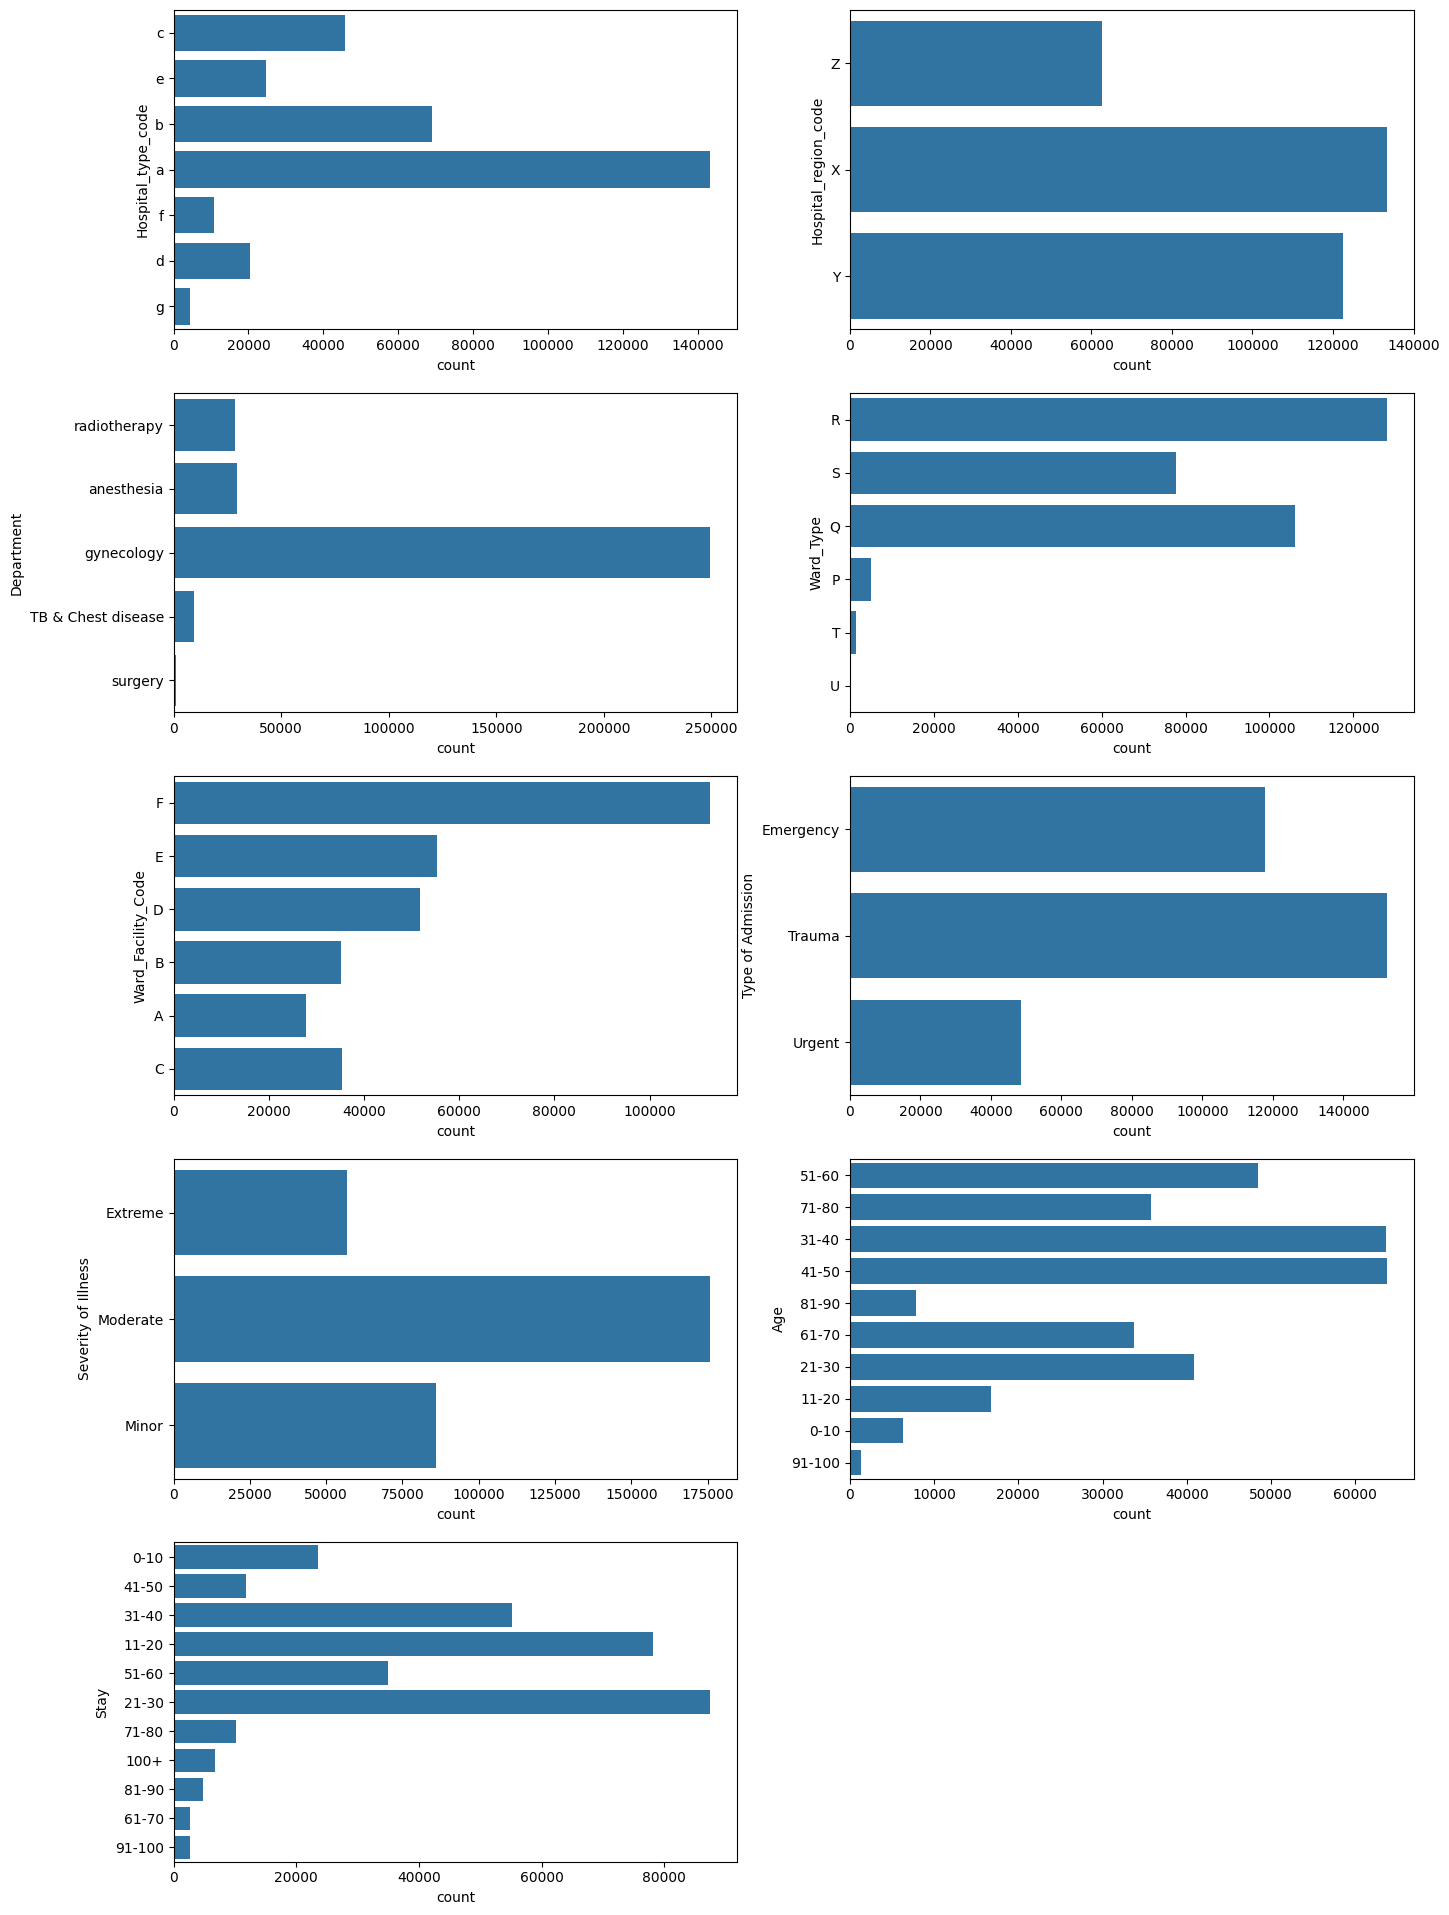

In [ ]:
## Plotting Countplot of variouss attributes

i=1
plt.figure(figsize=(16,34))
for col in train.columns:
    if train[col].dtypes=='object':
        plt.subplot(7,2,i)
        sns.countplot(train[col])
        i=i+1
    else:
        pass
plt.show()


In [ ]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [ ]:
## Renaming column name
train=train.rename(columns={'Available Extra Rooms in Hospital':'Extra_Rooms_Available'})
train.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Extra_Rooms_Available', 'Department',
       'Ward_Type', 'Ward_Facility_Code', 'Bed Grade', 'patientid',
       'City_Code_Patient', 'Type of Admission', 'Severity of Illness',
       'Visitors with Patient', 'Age', 'Admission_Deposit', 'Stay'],
      dtype='object')

In [ ]:
## Replacing Age range by number labels

Age={'0-10':1,'11-20':2,'21-30':3,'31-40':4,'41-50':5,'51-60':6,'61-70':7,'71-80':8,'81-90':9,'91-100':10}

train['Age']=train['Age'].replace(Age.keys(),Age.values())

In [ ]:
## Replacing Targeted columns stay range by number class to pridict well.

stay_class={'0-10':0,'11-20':1,'21-30':2,'31-40':3,'41-50':4,'51-60':5,'61-70':6,'71-80':7,'81-90':8,'91-100':9,'100+':10}

train['Stay']=train['Stay'].replace(stay_class.keys(),stay_class.values())

train['Stay'].unique()

array([ 0,  4,  3,  1,  5,  2,  7, 10,  8,  6,  9])

In [ ]:
num_col.append('Age')
num_col.append('Stay')
num_col

['case_id',
 'Hospital_code',
 'City_Code_Hospital',
 'Available Extra Rooms in Hospital',
 'Bed Grade',
 'patientid',
 'City_Code_Patient',
 'Visitors with Patient',
 'Admission_Deposit',
 'Age',
 'Stay']

In [ ]:
train.dtypes

,0
case_id,int64
Hospital_code,int64
Hospital_type_code,object
City_Code_Hospital,int64
Hospital_region_code,object
Extra_Rooms_Available,int64
Department,object
Ward_Type,object
Ward_Facility_Code,object
Bed Grade,float64


In [ ]:
new_catg_col=[]

for col in train.columns:
    if train[col].dtypes=='object':
        new_catg_col.append(col)
    else:
        pass

In [ ]:
new_catg_col

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness']

In [ ]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Extra_Rooms_Available,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,6,4911.0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,6,5954.0,4
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,6,4745.0,3
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,6,7272.0,4
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,6,5558.0,4


In [ ]:
## Label Encoding

le=LabelEncoder()
for col in new_catg_col:
    train[col]= le.fit_transform(train[col])

train

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Extra_Rooms_Available,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,6,4911.0,0
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,6,5954.0,4
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,6,4745.0,3
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,6,7272.0,4
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,6,5558.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,0,6,0,3,3,1,5,4.0,86499,23.0,0,2,3,5,4144.0,1
318434,318435,24,0,1,0,2,1,1,4,4.0,325,8.0,2,2,4,9,6699.0,3
318435,318436,7,0,4,0,3,2,2,5,4.0,125235,10.0,0,1,3,8,4235.0,1
318436,318437,11,1,2,1,3,1,1,3,3.0,91081,8.0,1,1,5,2,3761.0,1


<Axes: >

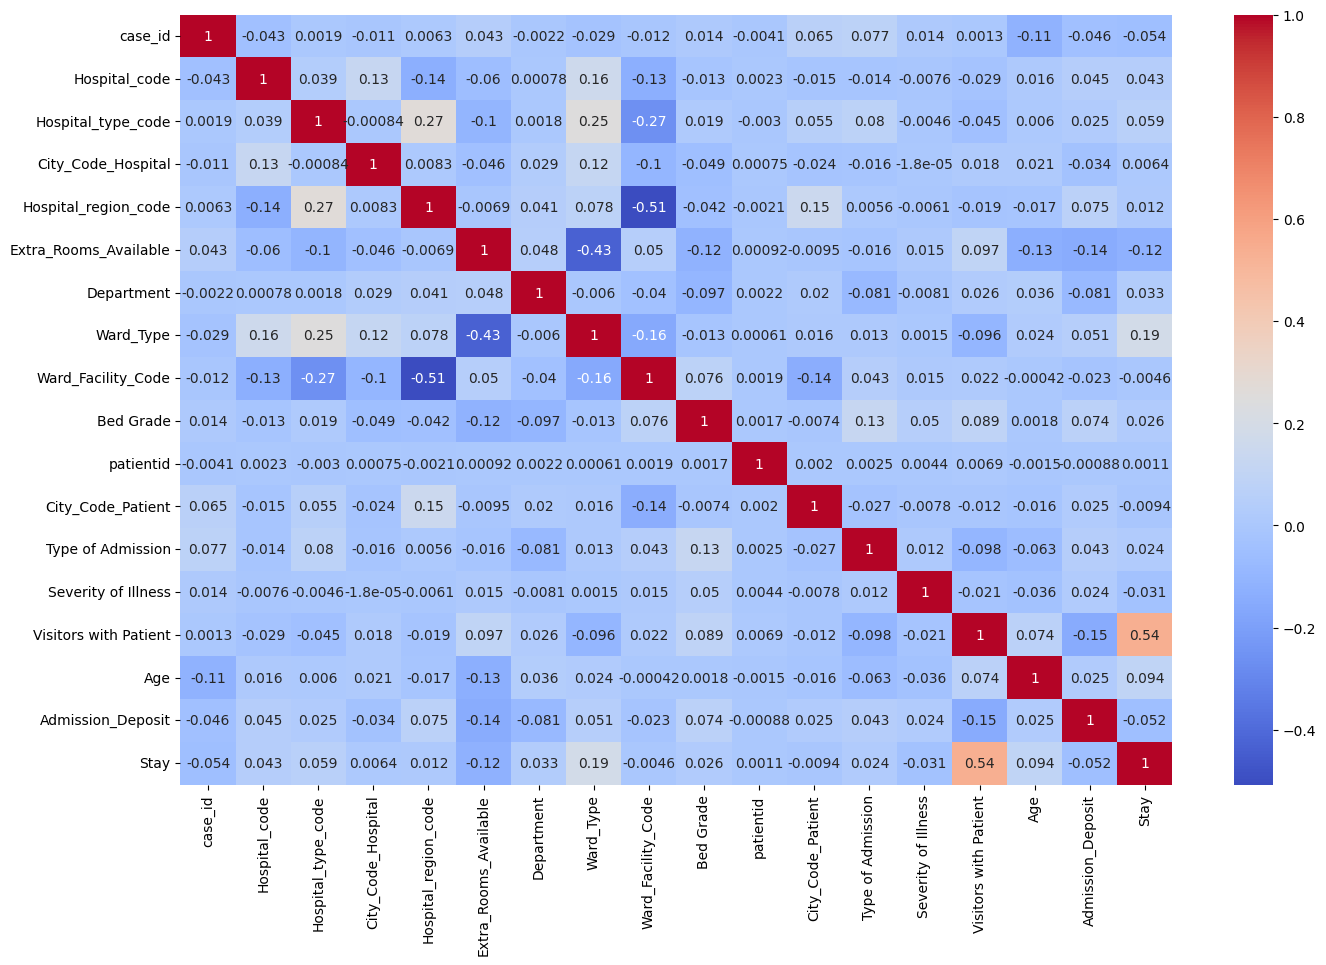

In [ ]:
## Co relation Heatmap
plt.figure(figsize=(16,10))
sns.heatmap(train.corr(),annot=True,cmap='coolwarm')

In [ ]:
train.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Extra_Rooms_Available', 'Department',
       'Ward_Type', 'Ward_Facility_Code', 'Bed Grade', 'patientid',
       'City_Code_Patient', 'Type of Admission', 'Severity of Illness',
       'Visitors with Patient', 'Age', 'Admission_Deposit', 'Stay'],
      dtype='object')

In [ ]:
## x => Independent Variables , y=> Dependent Variable

x=train.drop(columns=['case_id','patientid','Stay'])
y=train['Stay']

In [ ]:
## Data Splitting into training and testing

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#Grid Search
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
#pipeline
from sklearn.pipeline import Pipeline


In [ ]:
## Defining Model

model={ "LogisticRegression":LogisticRegression(multi_class='multinomial'),
        "DecisionTreeClassifier":DecisionTreeClassifier(),
        "KNeighborsClassifier":KNeighborsClassifier(),
        "MultinomialNB":MultinomialNB(),
        "AdaBoostClassifier":AdaBoostClassifier(),
        "GradientBoostingClassifier":GradientBoostingClassifier(),
        "RandomForestClassifier":RandomForestClassifier(),
        "XGBClassifier":XGBClassifier()
       }


In [ ]:
# model_training function is for training various models on the dataset
# models -> dictionary
# xtrain -> Training Attributes
# xtest -> Testing Attributes
# ytrain -> Train class
# ytest-> test class
# scale_flag -> 0(no scaling),1(standard),2(minmax)

def model_training(model,xtrain,xtest,ytrain,ytest,scale_flag):
    result={}
    for key,value in model.items():
        try:
            if (scale_flag==1):
                model_pipeline=Pipeline([('StandardScaler',StandardScaler()),('model',value)])
            elif(scale_flag==2):
                model_pipeline=Pipeline([('MinMaxScaler',MinMaxScaler()),('model',value)])
            else:
                model_pipeline=Pipeline([('model',value)])
            #Model Training and Prediction
            model_fit=model_pipeline.fit(xtrain,ytrain)
            ypred=model_fit.predict(xtest)
            acc=accuracy_score(ytest,ypred)
            print("Accuracy for {} is {}".format(key, acc))
            result[key]=acc
        except:
            print("Something went wrong")
    return result


In [ ]:
## Function for best model
def bestModel(model_result):
    high=0
    for name,acc in model_result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best Model is ",model_name,"with Accuracy ",high)

In [ ]:
## Model Accuracy On Standard Scaler Data
model_result_ss=model_training(model,xtrain,xtest,ytrain,ytest,1)

Accuracy for LogisticRegression is 0.3804955407612109
Accuracy for DecisionTreeClassifier is 0.2958328099484989
Accuracy for KNeighborsClassifier is 0.33312397939957294
Something went wrong
Accuracy for AdaBoostClassifier is 0.33131830172088933
Accuracy for GradientBoostingClassifier is 0.41554138927270445
Accuracy for RandomForestClassifier is 0.38399698530335385
Accuracy for XGBClassifier is 0.4245069714859942


In [ ]:
## Best model On Standard Scaler Data
bestModel(model_result_ss)

Best Model is  XGBClassifier with Accuracy  0.4245069714859942


In [ ]:
## Models Accuracy On MinMaxScaler Data.
model_result_mm=model_training(model,xtrain,xtest,ytrain,ytest,2)

Accuracy for LogisticRegression is 0.37697839467403593
Accuracy for DecisionTreeClassifier is 0.2959113176736591
Accuracy for KNeighborsClassifier is 0.30253736967717626
Accuracy for MultinomialNB is 0.2788751413139053
Accuracy for AdaBoostClassifier is 0.33131830172088933
Accuracy for GradientBoostingClassifier is 0.41554138927270445
Accuracy for RandomForestClassifier is 0.3835259389523929
Accuracy for XGBClassifier is 0.4245069714859942


In [ ]:
## Best model On MinMaxScaler Data
bestModel(model_result_mm)

Best Model is  XGBClassifier with Accuracy  0.4245069714859942


In [ ]:
## Model Accuracy on Normal Data
model_result=model_training(model,xtrain,xtest,ytrain,ytest,0)

Accuracy for LogisticRegression is 0.31604069840472304
Accuracy for DecisionTreeClassifier is 0.29548737595779423
Accuracy for KNeighborsClassifier is 0.26917158648411005
Accuracy for MultinomialNB is 0.30208202487124736
Accuracy for AdaBoostClassifier is 0.33131830172088933
Accuracy for GradientBoostingClassifier is 0.41554138927270445
Accuracy for RandomForestClassifier is 0.3848762718251476
Accuracy for XGBClassifier is 0.4245069714859942


In [ ]:
## Best Model on Normal Data
bestModel(model_result)

Best Model is  XGBClassifier with Accuracy  0.4245069714859942


Class 2 has maximum count

Class 6 has low count.

##### As we can see here the data is highly unbalance.We have to balance the data set in order to get good accuracy result.

In [ ]:
## Undersampling for data balancing
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(random_state=42)
x1,y1=os.fit_resample(x,y)
x1.shape,y1.shape

((962401, 15), (962401,))

In [ ]:
y1.value_counts()

,count
Stay,
0,87491
4,87491
3,87491
1,87491
5,87491
2,87491
7,87491
10,87491
8,87491


It get Oversampled with class 2 count.

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.20,random_state=42)

In [ ]:
## Model Accuracy On Normal Data and after data balancing
model_result_ND=model_training(model,xtrain,xtest,ytrain,ytest,0)

Accuracy for LogisticRegression is 0.20384349624118744
Accuracy for DecisionTreeClassifier is 0.8467173383346928
Accuracy for KNeighborsClassifier is 0.7228453717509781
Accuracy for MultinomialNB is 0.19302684420799976
Accuracy for AdaBoostClassifier is 0.21343924854920746
Accuracy for GradientBoostingClassifier is 0.32367350543690027
Accuracy for RandomForestClassifier is 0.863747590671287
Accuracy for XGBClassifier is 0.45278235254388743


In [ ]:
bestModel(model_result_ND)

Best Model is  RandomForestClassifier with Accuracy  0.863747590671287


In [ ]:
## Model Accuracy On Standard Scaler Data and after data balancing
model_result_SSDB=model_training(model,xtrain,xtest,ytrain,ytest,1)

Accuracy for LogisticRegression is 0.25107932731022803
Accuracy for DecisionTreeClassifier is 0.8466030413391452
Accuracy for KNeighborsClassifier is 0.7392262093401427
Something went wrong
Accuracy for AdaBoostClassifier is 0.21343924854920746
Accuracy for GradientBoostingClassifier is 0.32367350543690027
Accuracy for RandomForestClassifier is 0.8634410669105003
Accuracy for XGBClassifier is 0.45278235254388743


In [ ]:
bestModel(model_result_SSDB)

Best Model is  RandomForestClassifier with Accuracy  0.8634410669105003


In [ ]:
## Model Accuracy On MinMaxScaler Data and after data balancing
model_result_MMDB=model_training(model,xtrain,xtest,ytrain,ytest,2)

Accuracy for LogisticRegression is 0.25068967846177026
Accuracy for DecisionTreeClassifier is 0.8466290179290423
Accuracy for KNeighborsClassifier is 0.7343218291675542
Accuracy for MultinomialNB is 0.18546765654791902
Accuracy for AdaBoostClassifier is 0.21343924854920746
Accuracy for GradientBoostingClassifier is 0.32367350543690027
Accuracy for RandomForestClassifier is 0.8632904026890966
Accuracy for XGBClassifier is 0.45278235254388743


In [ ]:
bestModel(model_result_MMDB)

Best Model is  RandomForestClassifier with Accuracy  0.8632904026890966
